<img src="https://raw.githubusercontent.com/zhaochenyang20/zhaochenyang20.github.io/master/img/profile_7.jpg" style="zoom:23%;" />

# Python, More than Python

**By [Eren Zhao](https://zhaochenyang20.github.io/), credited to SAST 2022 Summer Tutorial**

**THUCST Class 06**

大家好，这篇文档主要来分享下一些 Python 的进阶内容，介绍一些实用技能栈。

Python 有很多开发环境可供选择，我也常常被问起在工作中使用哪一种开发环境。我的答案有时会让人惊讶：我偏爱的开发环境是 [IPython](http://ipython.org/) 加上一个文本编辑器（VSCode）。

IPython（interactive Python 的简称，即交互式 Python）致力于提供“科学计算的全生命周期开发工具”。

如果将 Python 看作数据科学任务的引擎，那么 IPython 就是一个交互式控制面板。除了作为 Python 的一个交互式接口，IPython 还提供了一些有用的 Python 语法附加功能，本讲义就将介绍其中最有用的一些。

另外， IPython 被紧密地连接在 [Jupyter 项目](http://jupyter.org)中。Jupyter Notebook 的格式与你此刻正在阅读的页面看起来其实没什么两样，这一章的全部稿件就是用一组 IPython Notebook 写成的。

IPython 就是用 Python 进行有效的交互式科学计算和数据密集型计算。我们将会介绍 IPython 对 Python 数据科学非常优雅的功能，尤其关注它在语法上超越了 Python 的特性。

接下来将深入介绍一些更有用的“魔法命令”，这些命令可以为与创建和使用数据科学代码相关的常规任务提高速度。最后将介绍 IPython Notebook 的一些特性，这些特性对于理解数据和分享结果非常有用。

# Help and Documentation in IPython

当一个技术型思维的人要帮助他的朋友、家人或同事解决计算机方面的问题时，大多数时候，重要的不是知道答案，而是知道如何快速找到答案，因此，我认为本节中讨论的工具对我的日常工作流程的贡献是最大的。

在数据科学领域也一样，通过搜索在线文档、邮件列表、Stack Overflow 等网络资源都可以获得丰富的信息，即使（尤其是）你曾经搜索过这个主题。要想成为一名高效的数据科学实践者，重要的不是记住针对每个场景应该使用的工具或命令，而是学习如何有效地找到未知信息，无论是通过搜索引擎还是其他方式。

IPython 和 Jupyter 最大的用处之一就是能缩短用户与帮助文档和搜索间的距离，帮助用户高效完成工作。虽然网络搜索在解答复杂问题时非常有用，但是仅仅使用 IPython 就能找到大量的信息了。以下是仅通过几次按键，IPython 就可以帮你解答的一些问题。

• 我如何调用这个函数？这个函数有哪些参数和选项？
• 这个 Python 对象的源代码是怎样的？
• 我导入的包中有什么？这个对象有哪些属性和方法？

接下来将介绍如何通过 IPython 工具来快速获取这些信息。符号 `?` 用于浏览文档，符号 `??` 用于浏览源代码，而 Tab 键可以用于自动补全。

## Accessing Documentation with ``?``

Python 语言和其数据科学生态系统是应用户需求而创建的，而用户的很大一部分需求就是获取文档。

每一个 Python 对象都有一个字符串的引用，该字符串即 docstring。

大多数情况下，该字符串包含对象的简要介绍和使用方法。Python 内置的 help() 函数可以获取这些信息，并且能打印输出结果。

例如，如果要查看内置的 len 函数的文档，可以按照以下步骤操作：

```ipython
In [1]: help(len)
Help on built-in function len in module builtins:

len(...)
    len(object) -> integer

    Return the number of items of a sequence or mapping.
```

根据不同的解释器，这条信息可能会展示为内嵌文本，或者出现在单独的弹出窗口中。

获取关于一个对象的帮助非常常见，也非常有用，所以 IPython 引入了 `?` 符号作为获取这个文档和其他相关信息的缩写：

```ipython
In [2]: len?
Type:        builtin_function_or_method
String form: <built-in function len>
Namespace:   Python builtin
Docstring:
len(object) -> integer

Return the number of items of a sequence or mapping.
```

这种表示方式几乎适用于一切，包括对象方法：

```ipython
In [3]: L = [1, 2, 3]
In [4]: L.insert?
Type:        builtin_function_or_method
String form: <built-in method insert of list object at 0x1024b8ea8>
Docstring:   L.insert(index, object) -- insert object before index
```

甚至对于对象本身以及相关类型的文档也适用：

```ipython
In [5]: L?
Type:        list
String form: [1, 2, 3]
Length:      3
Docstring:
list() -> new empty list
list(iterable) -> new list initialized from iterable's items
```

重要的是，这种方法也适用于你自己创建的函数或者其他对象！下面定义一个带有 docstring 的小函数：

```ipython
In [6]: def square(a):
  ....:     """Return the square of a."""
  ....:     return a ** 2
  ....:
```

请注意，为了给函数创建一个 docstring，仅仅在第一行放置了一个字符串字面量。由于 docstring 通常是多行的，因此按照惯例，用 Python 的三个引号表示多行字符串。

接下来用 `?` 符号来找到这个 docstring：

```ipython
In [7]: square?
Type:        function
String form: <function square at 0x103713cb0>
Definition:  square(a)
Docstring:   Return the square of a.
```

你应该养成在你写的代码中添加这样的内嵌文档的习惯，这样就可以通过 docstring 快速获取文档。

## Accessing Source Code with ``??``

由于 Python 非常易读，所以你可以通过阅读你感兴趣的对象的源代码得到更高层次的理解。IPython 提供了获取源代码的快捷方式（使用两个问号 ??）：

```ipython
In [8]: square??
Type:        function
String form: <function square at 0x103713cb0>
Definition:  square(a)
Source:
def square(a):
    "Return the square of a"
    return a ** 2
```

对于这样的简单函数，两个问号就可以帮助你深入理解隐含在表面之下的实现细节。

如果你经常使用 ?? 后缀，就会发现它有时不能显示源代码。这是因为你查询的对象并不是用 Python 实现的，而是用 C 语言或其他编译扩展语言实现的。在这种情况下，?? 后缀将等同于 ? 后缀。你将会在很多 Python 内置对象和类型中发现这样的情况，例如上面示例中提到的 len 函数：

```ipython
In [9]: len??
Type:        builtin_function_or_method
String form: <built-in function len>
Namespace:   Python builtin
Docstring:
len(object) -> integer

Return the number of items of a sequence or mapping.
```

? 和 ?? 提供了一个强大又快速的接口，可以查找任何 Python 函数或模块的用途信息。

## Exploring Modules with Tab-Completion

IPython 另一个有用的接口是用 Tab 键自动补全和探索对象、模块及命名空间的内容。在接下来的示例中，我们将用 \<TAB\> 来表示 Tab 键。

### Tab-completion of object contents

每一个 Python 对象都包含各种属性和方法。和此前讨论的 help 函数类似，Python 有一个内置的 dir 函数，可以返回一个属性和方法的列表。但是 Tab 自动补全接口在实际的应用过程中更简便。要想看到对象所有可用属性的列表，可以输入这个对象的名称，再加上一个句点（.）和 Tab 键：

```ipython
In [10]: L.<TAB>
L.append   L.copy     L.extend   L.insert   L.remove   L.sort     
L.clear    L.count    L.index    L.pop      L.reverse  
```

为了进一步缩小整个列表，可以输入属性或方法名称的第一个或前几个字符，然后 Tab 键将会查找匹配的属性或方法：

```ipython
In [10]: L.c<TAB>
L.clear  L.copy   L.count  

In [10]: L.co<TAB>
L.copy   L.count 
```

如果只有一个选项，按下 Tab 键将会把名称自动补全。例如，下面示例中的内容将会马上被 L.count 替换：

```ipython
In [10]: L.cou<TAB>

```

尽管 Python 没有严格区分公共 / 外部属性和私有 / 内部属性，但是按照惯例，前面带有下划线表示私有属性或方法。为了清楚起见，这个列表中默认省略了这些私有方法和特殊方法。不过，你可以通过明确地输入一条下划线来把这些私有的属性或方法列出来：

```ipython
In [10]: L._<TAB>
L.__add__           L.__gt__            L.__reduce__
L.__class__         L.__hash__          L.__reduce_ex__
```

为了简洁起见，这里只展示了输出的前两行，大部分是 Python 特殊的双下划线方法（昵称叫作“dunder 方法”）。

### Tab completion when importing

Tab 自动补全在从包中导入对象时也非常有用。下面用这种方法来查找 itertools 包中以 co 开头的所有可导入的对象：
```
In [10]: from itertools import co<TAB>
combinations                   compress
combinations_with_replacement  count
```

同样，你也可以用 Tab 自动补全来查看你系统中所有可导入的包（这将因你的 Python 会话中有哪些第三方脚本和模块可见而不同）：

```
In [10]: import <TAB>
Display all 399 possibilities? (y or n)
Crypto              dis                 py_compile
Cython              distutils           pyclbr
...                 ...                 ...
difflib             pwd                 zmq

In [10]: import h<TAB>
hashlib             hmac                http
heapq               html                husl
```
（为了简洁起见，并没有打印我的系统中所有可导入的 399 个包和模块。）

# Keyboard Shortcuts in the IPython Shell

如果你常用计算机，你可能在工作流程中使用过快捷键。最熟悉的可能是 Cmd + C 和 Cmd + V（或者是 Ctrl + C 和 Ctrl + V），它们在很多程序和系统中用于复制和粘贴。高级用户会将快捷键用得更加深入和广泛，流行的文本编辑器（如 Emacs、Vim 等）通过复杂的按键组合为用户提供了很多快捷操作。

IPython 并没有上述编辑器那么强大，但是它也提供了一些快捷方式，能帮你在录入命令的时候快速导航。我们会将这些快捷键分为几类：导航快捷键、文本输入快捷键、命令历史快捷键和其他快捷键。此处仅仅介绍历史快捷键和其他快捷键，完整的介绍见完整版讲义。

## Command History Shortcuts

可能本章讨论的最有效的快捷方式是 IPython 提供的导航命令历史的快捷方式。这个命令历史超越了你当前的 IPython 会话——你所有的命令历史都会存储在一个 IPython 配置文件路径下的 SQLite 数据库中。获取这些命令最直接的方式就是用上下箭头遍历历史，但是仍然还有些别的选项。

| Keystroke                           | Action                                     |
|-------------------------------------|--------------------------------------------|
| ``Ctrl-p`` (or the up arrow key)    | Access previous command in history         |
| ``Ctrl-n`` (or the down arrow key)  | Access next command in history             |
| ``Ctrl-r``                          | Reverse-search through command history     |

反向搜索特别有用。在前一节中，我们定义了一个叫作 square 的函数。让我们从一个新的 IPython shell 中反向搜索 Python 历史，重新找到这个函数的定义。当你在 IPython 终端按下 Ctrl + r 键时，将看到如下提示：

```ipython
In [1]:
(reverse-i-search)`':
```

如果你在该提示后开始输入字符，IPython 将自动填充时间最近的命令。如果有的话，将会匹配到如下字符：

```ipython
In [1]:
(reverse-i-search)`sqa': square??
```

你可以随时添加更多的字符来重新定义搜索，或者再一次按下 Ctrl + r 键来寻找另外一个匹配该查询的命令。如果你在前一节中照做了的话，按下 Ctrl + r 键两次将可以看到：

```ipython
In [1]:
(reverse-i-search)`sqa': def square(a):
    """Return the square of a"""
    return a ** 2
```

找到你在寻找的命令后，按下 Return 键将会终止查找。然后就可以利用查找到的命令，继续我们的会话：

```ipython
In [1]: def square(a):
    """Return the square of a"""
    return a ** 2

In [2]: square(2)
Out[2]: 4
```
请注意，你也可以用 Ctrl + p / Ctrl + n 或者上下方向键查找历史，但是仅仅是匹配每行的前几个字符。也就是说，如果你输入 def 然后按下 Ctrl + p，则会在你的命令历史中找到以def 开头的最近的命令（如果有的话）。

## Miscellaneous Shortcuts

还有一些不能归纳在之前几个类别中的快捷键，但是它们也非常有用。

| Keystroke                     | Action                                     |
|-------------------------------|--------------------------------------------|
| ``Ctrl-l``                    | Clear terminal screen                      |
| ``Ctrl-c``                    | Interrupt current Python command           |
| ``Ctrl-d``                    | Exit IPython session                       |

如果你无意间开启了一个运行时间非常长的程序，Ctrl + c 快捷键就能派上大用场。这里讨论的一些快捷键可能乍看上去有些麻烦，但是经过实践你很快就会习惯它们。一旦你形成了这种肌肉记忆，甚至会希望将这些快捷方式应用到其他场景中。

# IPython Magic Commands

前两节介绍了 IPython 如何让你以更有效且可交互的方式使用和探索 Python。本节将介绍一些 IPython 在普通 Python 语法基础之上的增强功能。这些功能被称作 IPython 魔法命令，并且都以 % 符号作为前缀。这些魔法命令设计用于简洁地解决标准数据分析中的各种常见题。魔法命令有两种形式：行魔法（line magic）和单元魔法（cell magic）。行魔法以单个 % 字符作为前缀，作用于单行输入；单元魔法以两个 %% 作为前缀，作用于多行输入。下面将展示和讨论一些简单的例子，本章后面会更详细地讨论一些有用的魔法命令。

## Running External Code: ``%run``

当你开发更复杂的代码时，可能会发现自己在使用 IPython 进行交互式探索的同时，还需要使用文本编辑器存储你希望重用的代码。

在 IPython 会话中运行之前的代码非常方便，不用在另一个新窗口中运行这些程序代码。这个功能可以通过 %run 魔法命令来实现。假设你创建了一个 myscript.py 文件，该文件包含以下内容：

```python
#-------------------------------------
# file: myscript.py

def square(x):
    """square a number"""
    return x ** 2

for N in range(1, 4):
    print(N, "squared is", square(N))
```

你可以在像下面这样在 IPython 会话中运行该程序：

```ipython
In [6]: %run myscript.py
1 squared is 1
2 squared is 4
3 squared is 9
```

请注意，当你运行了这段代码之后，该代码中包含的所有函数都可以在 IPython 会话中使用：

```ipython
In [7]: square(5)
Out[7]: 25
```
IPython 提供了几种方式来调整代码如何执行。你可以在 IPython 解释器中输入 %run? 查看帮助文档。

## Timing Code Execution: ``%timeit``
另一个非常有用的魔法函数是 %timeit，它会自动计算接下来一行的 Python 语句的执行时间。例如，我们可能想了解列表综合的性能：

```ipython
In [8]: %timeit L = [n ** 2 for n in range(1000)]
1000 loops, best of 3: 325 µs per loop
```
%timeit 的好处是，它会自动多次执行简短的命令，以获得更稳定的结果。对于多行语句，可以加入第二个 % 符号将其转变成单元魔法，以处理多行输入。例如，下面是 for 循环的同等结构：

```ipython
In [9]: %%timeit
   ...: L = []
   ...: for n in range(1000):
   ...:     L.append(n ** 2)
   ...:
1000 loops, best of 3: 373 µs per loop
```

从以上结果可以立刻看出，列表综合比同等的 for 循环结构快约 10%。我们将在 1.9 节中进一步探索 %timeit 和其他对代码进行计时和分析的方法。

## Help on Magic Functions: ``?``, ``%magic``, and ``%lsmagic``

和普通的 Python 函数一样，IPython 魔法函数也有文档字符串，并且可以通过标准的方式获取这些有用的文档注释。例如，为了读到 %timeit 魔法函数的文档注释，可以简单地输入以下命令：

```ipython
In [10]: %timeit?
```

其他函数的文档注释也可以通过类似方法获得。为了获得可用魔法函数的通用描述以及一些示例，可以输入以下命令：

```ipython
In [11]: %magic
```

为了快速而简单地获得所有可用魔法函数的列表，可以输入以下命令：

```ipython
In [12]: %lsmagic
```

最后我还想提醒你，更直接的方式是按照你的意愿定义你自己的魔法函数。这里不会具体介绍，但是如果你感兴趣，可以参考文末的参考资料。

# Input and Output History

我们在前面看到，IPython shell 允许用上下方向键或 Ctrl + p / Ctrl + n 快捷键获取历史命令。另外，IPython 在 shell 和 Notebook 中都提供了几种获取历史命令的输出方式，以及这些命令本身的字符串形式。本节将会具体介绍。

## IPython's ``In`` and ``Out`` Objects

到目前为止，我想你应该特别熟悉 IPython 用到的 In[1]:/Out[1]: 形式的提示了。但实际上，它们并不仅仅是好看的装饰形式，还给出了在当前会话中如何获取输入和输出历史的线索。假设你用以下形式启动了一个会话：

```ipython
In [1]: import math

In [2]: math.sin(2)
Out[2]: 0.9092974268256817

In [3]: math.cos(2)
Out[3]: -0.4161468365471424
```

我们导入了一个内置的 math 程序包，然后计算 2 的正弦函数值和余弦函数值。这些输入和输出在 shell 中带有 In/Out 标签，但是不仅如此——IPython 实际上创建了叫作 In 和 Out 的 Python 变量，这些变量自动更新以反映命令历史：

```ipython
In [4]: print(In)
['', 'import math', 'math.sin(2)', 'math.cos(2)', 'print(In)']

In [5]: Out
Out[5]: {2: 0.9092974268256817, 3: -0.4161468365471424}
```

In 对象是一个列表，按照顺序记录所有的命令（列表中的第一项是一个占位符，以便In[1] 可以表示第一条命令）：

```ipython
In [6]: print(In[1])
import math
```

Out 对象不是一个列表，而是一个字典。它将输入数字映射到相应的输出（如果有的话）：

```ipython
In [7]: print(Out[2])
0.9092974268256817
```

请注意，不是所有操作都有输出，例如 import 语句和 print 语句就不影响输出。对于后者你可能会感到有点意外，但是仔细想想，print 是一个函数，它的返回值是 None，这样就能说通了。总的来说，任何返回值是 None 的命令都不会加到 Out 变量中。

如果想利用之前的结果，理解以上内容将大有用处。例如，利用之前的计算结果检查 sin(2) ** 2 和 cos(2) ** 2 的和，结果如下：results:

```ipython
In [8]: Out[2] ** 2 + Out[3] ** 2
Out[8]: 1.0
```

输出结果是 1.0，符合勾股定理。在这个例子中，可能不需要利用之前的结果，但是如果你执行一个非常复杂的计算并且希望重复利用运算结果，那么该方法就会非常有用。

## Underscore Shortcuts and Previous Outputs

标准的 Python shell 仅仅包括一个用于获取以前的输出的简单快捷键。变量 _（单下划线）用于更新以前的输出，而这种方式在 IPython 中也适用：

```ipython
In [9]: print(_)
1.0
```

但是 IPython 更进了一步——你可以用两条下划线获得倒数第二个历史输出，用三条下划线获得倒数第三个历史输出（跳过任何没有输出的命令）：

```ipython
In [10]: print(__)
-0.4161468365471424

In [11]: print(___)
0.9092974268256817
```

IPython 的这一功能就此停止：超过三条下划线开始变得比较难计数，并且在这种情况下通过行号来指定输出更方便。

这里还要提到另外一个快捷键——Out[X] 的简写形式是 _X（即一条下划线加行号）：

```ipython
In [12]: Out[2]
Out[12]: 0.9092974268256817

In [13]: _2
Out[13]: 0.9092974268256817
```

## Related Magic Commands

如果想一次性获取此前所有的输入历史，%history 魔法命令会非常有用。在下面的示例中可以看到如何打印前 4 条输入命令：

```ipython
In [16]: %history -n 1-4
   1: import math
   2: math.sin(2)
   3: math.cos(2)
   4: print(In)
```

按照惯例，可以输入 %history? 来查看更多相关信息以及可用选项的详细描述。其他类似的魔法命令还有 %rerun（该命令将重新执行部分历史命令）和 %save（该命令将部分历史命令保存到一个文件中）。如果想获取更多相关信息，建议你使用 ? 帮助功能（详情请参见 1.2 节）。

# Shell Commands in IPython

你可以通过将 ! 符号作为前缀在 IPython 中执行任何命令行命令。例如，ls、pwd 和 echo 命令可以按照以下方式运行：

```ipython
In [1]: !ls
myproject.txt

In [2]: !pwd
/home/jake/projects/myproject

In [3]: !echo "printing from the shell"
printing from the shell
```

## Passing Values to and from the Shell

shell 命令不仅可以从 IPython 中调用，还可以和 IPython 命名空间进行交互。例如，你可以通过一个赋值操纵符将任何 shell 命令的输出保存到一个 Python 列表：

```ipython
In [4]: contents = !ls

In [5]: print(contents)
['myproject.txt']

In [6]: directory = !pwd

In [7]: print(directory)
['/Users/jakevdp/notebooks/tmp/myproject']
```

请注意，这些结果并不以列表的形式返回，而是以 IPython 中定义的一个特殊 shell 返回类型的形式返回：

```ipython
In [8]: type(directory)
IPython.utils.text.SList
```

这看上去和 Python 列表很像，并且可以像列表一样操作。但是这种类型还有其他功能，例如 grep 和 fields 方法以及 s、n 和 p 属性，允许你轻松地搜索、过滤和显示结果。你可以用 IPython 内置的帮助来查看更多的详细信息。
另一个方向的交互，即将 Python 变量传入 shell，可以通过 {varname} 语法实现：

```ipython
In [9]: message = "hello from Python"

In [10]: !echo {message}
hello from Python
```

变量名包含在大括号内，在 shell 命令中用实际的变量替代。

# Errors and Debugging

代码开发和数据分析经常需要一些试错，而 IPython 包含了一系列提高这一流程效率的工具。这一节将先简要探索调试代码中错误的工具。

## Debugging: When Reading Tracebacks Is Not Enough

标准的 Python 交互式调试工具是 pdb，它是 Python 的调试器。这个调试器允许用户逐行运行代码，以便查看可能导致错误的原因。IPython 增强版本的调试器是 ipdb，它是 IPython专用的调试器。
启动和运行这两个调试器的方式有很多，这里不会一一介绍。你可以通过在线文档了解关于它们的更多信息。
IPython 中最方便的调试界面可能就是 %debug 魔法命令了。如果你在捕获异常后调用该调试器，它会在异常点自动打开一个交互式调试提示符。ipdb 提示符让你可以探索栈空间的当前状态，探索可用变量，甚至运行 Python 命令，来看看最近的异常，然后执行一些简单的任务，然后输入 quit 来结束调试会话：

In [4]:
ErenFriendsList = ["lambda", "c7w", "learningRate"]
def ErenFriends(friends):
    print(friends[3])

ErenFriends(ErenFriendsList)

IndexError: list index out of range

In [5]:
%debug

> /var/folders/wz/s207qnq16zsgydkft7gznr040000gn/T/ipykernel_9667/2067241702.py(3)ErenFriends()
      1 ErenFriendsList = ["lambda", "c7w", "learningRate"]
      2 def ErenFriends(friends):
----> 3     print(friends[3])
      4 
      5 ErenFriends(ErenFriendsList)

['lambda', 'c7w', 'learningRate']


这个交互式调试器的功能不止如此，我们甚至可以设置单步入栈和出栈来查看各变量的值：

In [4]:
%debug

> /var/folders/wz/s207qnq16zsgydkft7gznr040000gn/T/ipykernel_7339/2835185721.py(2)<cell line: 2>()
      1 ErenFriendsList = ["lambda", "c7w", "learningRate"]
----> 2 print(ErenFriendsList[3])

*** Oldest frame
*** Oldest frame


这让你可以快速找到导致错误的原因，并且知道是哪一个函数调用导致了错误。
如果你希望在发生任何异常时都自动启动调试器，可以用 %pdb 魔法函数来启动这个自动过程：

In [9]:
%xmode Plain
%pdb on
ErenFriends(ErenFriendsList)

Exception reporting mode: Plain
Automatic pdb calling has been turned ON


IndexError: list index out of range

> /var/folders/wz/s207qnq16zsgydkft7gznr040000gn/T/ipykernel_7339/2067241702.py(3)ErenFriends()
      1 ErenFriendsList = ["lambda", "c7w", "learningRate"]
      2 def ErenFriends(friends):
----> 3     print(friends[3])
      4 
      5 ErenFriends(ErenFriendsList)



最后，如果你有一个脚本，并且希望以交互式模式运行，则可以用 %run -d 命令来运行，并利用 next 命令单步向下交互地运行代码。

# Profiling and Timing Code

在开发代码和创建数据处理管道的过程中，经常需要在各种实现方式之间取舍，但在开发算法的早期就考虑这些事情会适得其反。正如高德纳的名言所说：“大约 97% 的时间，我们应该忘记微小的效率差别；过早优化是一切罪恶的根源。”不过，一旦代码运行起来，提高代码的运行效率总是有用的。有时候查看给定命令或一组命令的的运行时间非常有用，有时候深入多行进程并确定一系列复杂操作的效率瓶颈也非常有用。IPython 提供了很多执行这些代码计时和分析的操作函数。我们将讨论以下IPython 魔法命令。

- ``%time``: Time the execution of a single statement
- ``%timeit``: Time repeated execution of a single statement for more accuracy

## Timing Code Snippets: ``%timeit`` and ``%time``

之前对魔法函数进行了简单的介绍，我们了解了 %timeit 行魔法和 %%timeit 单元魔法，其中 %%timeit 可以让代码段重复运行来计算代码的运行时间：

In [1]:
%timeit sum(range(100))

815 ns ± 12.4 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


请注意，因为这个操作很快，所以 %timeit 自动让代码段重复运行很多次。对于较慢的命令，%timeit 将自动调整并减少重复执行的次数：

In [ ]:
%%timeit
total = 0
for i in range(1000):
    for j in range(1000):
        total += i * (-1) ** j

有时候重复一个操作并不是最佳选择。例如，如果有一个列表需要排序，我们可能会被重复操作误导。对一个预先排好序的列表进行排序，比对一个无序的列表进行排序要快，所以重复运行将使结果出现偏差：

In [ ]:
import random
L = [random.random() for i in range(100000)]
%timeit L.sort()

100 loops, best of 3: 1.9 ms per loop


对于这种情况，%time 魔法函数可能是更好的选择。对于运行时间较长的命令来说，如果较短的系统延迟不太可能影响结果，那么 %time 魔法函数也是一个不错的选择。下面对一个无序列表排序和一个已排序列表排序分别计时：

In [ ]:
import random
L = [random.random() for i in range(100000)]
print("sorting an unsorted list:")
%time L.sort()

sorting an unsorted list:
CPU times: user 40.6 ms, sys: 896 µs, total: 41.5 ms
Wall time: 41.5 ms


In [ ]:
print("sorting an already sorted list:")
%time L.sort()

sorting an already sorted list:
CPU times: user 8.18 ms, sys: 10 µs, total: 8.19 ms
Wall time: 8.24 ms


可以看出，虽然对已排序的列表进行排序比对未排序的列表进行排序快很多，但是即使同样对已排序的列表进行排序，用 %time 计时也比用 %timeit 计时花费的时间要长。这是由于 %timeit 在底层做了一些很聪明的事情来阻止系统调用对计时过程的干扰。例如，%timeit 会阻止清理未利用的 Python 对象（即垃圾回收），该过程可能影响计时。因此，%timeit 通常比 %time 更快得到结果。
和 %timeit 一样，%time 魔法命令也可以通过双百分号语法实现多行代码的计时：

In [ ]:
%%time
total = 0
for i in range(1000):
    for j in range(1000):
        total += i * (-1) ** j

CPU times: user 504 ms, sys: 979 µs, total: 505 ms
Wall time: 505 ms


关于 %time 和 %timeit 的更多信息以及它们可用的参数选项，可以通过 IPython 的帮助功能（如在 IPython 提示符中输入 %time?）获取。

# Python 进阶

## Python 如何 debug

我们先从最原始的一个问题出发，Python 程序如何 debug。大家之前有学习过 C++ 的话，debug 基本上依靠打断点加 print 的方法完成，Python 同样如此，我们也可以基于主流 IDE 来打断点，或者输出调试。

然而我个人更倾向于将 IDE(pycharm) 视为一个带有代码补全功能的文本编辑器，所有的程序运行全是通过命令行执行。~~主要是我懒得操作 GUI 来配环境。~~

我来解释下为什么我会喜欢纯粹用命令行而不是用 IDE 的 GUI。这当然是从 python 的环境需要 conda 支持出发的，而 conda 的操作，IPython 等等完全是在命令行进行的。为什么会使用 conda，此处不再赘述，请查看讲义即可。此处展示下我电脑里的 conda 环境：

In [ ]:
!source activate
!conda info -e

# conda environments:
#
base                     /Users/zhaochen20/opt/anaconda3
analysis              *  /Users/zhaochen20/opt/anaconda3/envs/analysis
torch                    /Users/zhaochen20/opt/anaconda3/envs/torch



主要是我的电脑里 conda 环境各不相同，而每次为新的工程配置好了 conda 环境后，再配置到 IDE 里比较麻烦，所以我所有的代码都是 IDE 编辑 + shell 执行。

我这么做就会遇到一个小问题，我该怎么打断点呢，听上比较麻烦，似乎没有像 C艹 一样很方便的打断点的工具。这个时候，第一个库，IPython 可以起到很大作用。

IPthon (注意大小写)不仅是一个基于 Python Shell 的交互式解释器，同时，还是一个功能强大的 Python 库。IDE 的断点功能就是依靠 IPython 的 embed 方法实现的，我这里演示下。

In [6]:
from IPython import embed

x = 1
embed(header = "x")

Python 3.8.12 (default, Oct 12 2021, 06:23:56) 
Type 'copyright', 'credits' or 'license' for more information
IPython 8.4.0 -- An enhanced Interactive Python. Type '?' for help.


x

Out[1]: 1

1




这里其实就是起到了打断点的作用，基于此，我们就可以来讨论 Python 工程 debug 的问题。

最原始的办法当然是直接跑，然后全局跑，直到出 bug，然后对着行数去 debug。关键是你一次不一定能对，这样子得反复折腾很久。甚至，你可能会跑一个特别大的程序，中途不序列化储存数据，每次重跑都会跑很久，这显然很 brute 而且低效。

我自己的 debug 方法如下：

每当我对某段代码感到不确定，比如担心读取 json 的时候出现解码错误，大概用这个流程：

In [14]:
from IPython import embed

def prettify(file):
    with open(file, "r", encoding="utf-8") as f:
        try:
            meta_web = json.load(f)["html_content"]
        except Exception as e:
            print(e)
            print(file)
            embed()
            return
        soup = BeautifulSoup(meta_web, "lxml").prettify()
        with open(test_txt, "w", encoding = "utf-8") as t:
            t.write(soup)

基于这部分代码，我们能够实现读取文件，倘若文件无法去按照 json 格式读取，进入 exception 逻辑，打印出问题和出现问题的文件，进入 IPython 交互界面，根据需求查看程序执行情况，选择退出或者返回。

接下来，讲述下 jupyter notebook 的使用。实际上，这个讲义就是按照 jupyter notebook 写的，之前我一直对 jupyter 不以为然，直到最近才发现他真香。

> Jupyter Notebook 以网页的形式打开格式文件，可以在网页页面中直接编写代码和运行代码，代码的运行结果也会直接在代码块下显示的程序。如在编程过程中需要编写说明文档，可在同一个页面中直接编写，便于作及时的说明和解释。
> 同时，jupyter 能够在远端服务器启动后，在本地的浏览器编写，相当于是在 浏览器里的远端 IDE。
> 他还支持导出 tex, pdf, md 等主流文件，非常方便。

这里附带上一些我用 jupyter 写出的成果：

- [Distribution is all you need PDF](https://zhaochenyang20.github.io/pdf/distribution.pdf)

- [Distribution is all you need IPYNB](https://zhaochenyang20.github.io/ipynb/distribution.ipynb)

- [Python Tutorial PDF](https://zhaochenyang20.github.io/pdf/python_tutorial.pdf)

- [Python Tutorial IPYNB](https://zhaochenyang20.github.io/ipynb/python_tutorial.ipynb)

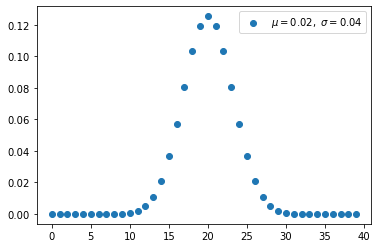

In [7]:
import numpy as np
from matplotlib import pyplot as plt
import operator as op
from functools import reduce
def const(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer / denom
def binomial(n, p):
    q = 1 - p
    y = [const(n, k) * (p ** k) * (q ** (n-k)) for k in range(n)]
    return y, np.mean(y), np.std(y)
for ls in [(0.5, 40)]:
    p, n_experiment = ls[0], ls[1]
    x = np.arange(n_experiment)
    y, u, s = binomial(n_experiment, p)
    plt.scatter(x, y, label=r'$\mu=%.2f,\ \sigma=%.2f$' % (u, s))
plt.legend()
plt.show()

# 常用基础库与技能

## tqdm

接下来介绍一些常用基础库，首先是 tqdm，这个库功能简单，直观易用，就是为循环加入可视化进度条，便于监视程序执行进度。

In [8]:
from tqdm import tqdm

for i in tqdm(range(10000000)):
    pass

100%|██████████| 10000000/10000000 [00:01<00:00, 5891043.54it/s]


这当我跑小型循环的时候，他当然不太需要监督进度，但是比如某次你需要要处理上千个文件，处理过程大概需要 30 分钟，故而不加入进度条，我们很难看到代码运行到了哪一步，这时候 tqdm 就会很方便。

## typing

typing 是一个用于写出精准注释的库，正常情况下，我们的代码需要如下的注释：

In [17]:
def train_each_document(document: str, process_id: int):
    """
    :param document: a json file path, containing a long string like "苟利国家生死以|美国的华莱士比你们不知道高到哪里去了|没这个能力|"
    :return: the neuron itself
    """
    pass

typing 库还支持更高级的注释，比如 List（注意大小写）：

In [18]:
from typing import List
def print_names(names: List[str]) -> None:
    for student in names:
        print(student)

当然，也支持[注释自己定义的类](https://zhaochenyang20.github.io/2022/01/09/CS/others/typing/)。可能在 Django 里有些作用...

## Counter and OrderedDict

Counter 和 OrderedDict 是两个 dictionary 的子类，非常方便。
我们都知道在字典中查找不存在的键，程序会抛出 KyeError的异常，但是由于 Counter 用于统计计数，因此 Counter 不同于字典，如果在 Counter 中查找一个不存在的元素，不会产生异常，而是会返回 0，这其实很好理解，Counter 计数将不存在元素的 count 值设置为 0。

对我而言，用了 Counter 类可以大量节省如下语句：

```python
from collections import Counter

course_total_order = {}

try:
   course_total_order[course] += 1
except:
   course_total_order[course] = 1

# 用 Counter 类之后，只用写

course_total_order = Counter()

course_total_order[course] += 1
```

OrderedDict 顾名思义，有序字典，Python 原生字典的实现是有序的，但是这个顺序很复杂，大概率不同于 key-value pair 加入 Dict 的顺序，而 OrderedDict 可以按照加入顺序来遍历。

In [9]:
from collections import OrderedDict

dict = OrderedDict()

dict["Eren"] = 1
dict["lambda"] = 2
dict["c7w"] = 3

for key in dict:
    print(key, dict[key])

Eren 1
lambda 2
c7w 3


## Pathlib

接下来是 Pathlib，我之前在我的 Mac 上写工程，我的文件路径是硬编码的，导致移植到 windows 上会出很多问题，而且经常因为路径里的"/"和"\"被坑，直到 lambda 给我推荐了 Pathlib

Pathlib 和 os 的很多操作类似，但是封装的更好，比如快捷的工作路径切换，目录拼接，还有文件检测。

In [10]:
import os
from pathlib import Path

store_path = Path.cwd() / "final_training_result"
if not store_path.is_dir():
    # os.makedirs(store_path)
    pass
store_name = store_path / "refactor.npz"
print(store_name, store_path)

/Users/zhaochen20/Git/blog_zhaochen20/source/ipynb/final_training_result/refactor.npz /Users/zhaochen20/Git/blog_zhaochen20/source/ipynb/final_training_result


## Numpy 序列化

Numpy 的功能非常强大，是专业的数据科学库。很多人说，numpy 就是用 C++ 写的 Python 库，效率堪比 C++。实际上，具体去了解下的话，numpy 比 C++ 还底层，他实际上大量用了 Fortran 来编写底层计算，堪比汇编的效率，这些内容留待数据分析课讲解，这里先讲讲序列化与反序列化。

在大家的小学期，大多数同学选择把一个很大的 Dict/list 存为 json，然后读取 json。我的建议是，用 numpy 把 Counter 序列化为 npz 格式，然后读取 npz。json 实际上是文本文件，Linux 内核读取文本文件的速度远低于读取二进制文件，而 npz（~~还有 npy~~）实际上是二进制文件，读取和加载速度非常快，而且比文本文件内存少了很多，从 1.4G 的 json 压缩为 0.6G 的npz。

当然，npz 自然有缺点，只能用 numpy 来读取，而且人类不可理解。我 SRT 的工作，需要把爬虫爬下来的网页解析 html，然后保存。我自己肯定就存 npz 了，但是我们组里其他同学完全不会用，所以我还是存了 json 和 CSV。

In [11]:
import os
from pathlib import Path
import numpy as np

store_path = Path.cwd() / "test.npz"
dict = {"Eren zhao": 1, "跳跳鸟": 2, "鲁大师": 3, "lambda": 4, "c7w": 5}
np.savez(store_path, dict=dict)
!ls

Python 进阶话题.ipynb     mock.ipynb                python_tutorial.ipynb
distribution.ipynb        numpy.ipynb               test.npz
ipython.ipynb             pandas.ipynb
matplotlib.ipynb          python class.ipynb


In [12]:
dictionary = np.load(Path.cwd() / "test.npz", allow_pickle=True)["dict"].item()
print(dictionary)

{'Eren zhao': 1, '跳跳鸟': 2, '鲁大师': 3, 'lambda': 4, 'c7w': 5}


当然，这背后还涉及 numpy Ndarray 的取对象和切片问题，且待下回分解。

## decorator

decorator 并非一个库，而是 python 的装饰器类的集合，与 OOP 的装饰器模式一脉相承，具体内容较为复杂，推荐大家阅读[Clean Python 这本书](https://zhaochenyang20.github.io/pdf/clean%20python.pdf)可以深入理解。
我实验室的大师兄（~~还有掌门师姐~~）他们写的 code，满篇都是这个样子：
```python
@metric
def train_total_dir(self, director):
    """
    use a director of document to train the neuron
    """
    try:
        training_list = get_list(director)
        results = p_map(train_each_document, training_list, range(1, len(training_list) + 1))
        for each in results:
            self.add_neuron(each)
        neo_one = {}
        neo_two = {}
        neo_three = {}
        print("filter 1 unit")
    except Exception as e:
        print(e)
```

我一直不太理解，这个 @metric 是什么意思，后来我发现了这个是修饰器语法，和 shebang 语法很像。（shebang 待会再讲）

```python
@metric
def func():
    pass

# 这句话等价于

func = metric(func)
```


In [13]:
def metric(fn):
    """running time for each main function"""

    @functools.wraps(fn)
    def wrapper(*args, **kw):
        print('start executing %s' % (fn.__name__))
        start_time = time.time()
        result = fn(*args, **kw)
        end_time = time.time()
        t = 1000 * (end_time - start_time)
        print('%s executed in %s ms' % (fn.__name__, t))
        return result
    return wrapper

这是我常用的装饰器，展示程序运行的毫秒数。

## argparse
接下来是 argparse，广泛应用于形式化解析命令行参数。

In [28]:
import argparse

def parser_data():
    parser = argparse.ArgumentParser(
        prog='Pinyin Input Method',
        description='Pinyin to Chinese.',
        allow_abbrev=True,
    )
    parser.add_argument('-i', '--input-file', dest='input_file_path', type=str, help="Input file")
    parser.add_argument('-o', '--output-file', dest='output_file_path', type=str, help="Output file")
    parser.add_argument('-c', '--coefficient', dest='coefficient', type=float, nargs=2, default=[0.4, 0.5], help="coefficient")
    input_file_path = parser.parse_args().input_file_path
    output_file_path = parser.parse_args().output_file_path
    coefficient = parser.parse_args().coefficient
    try:
        assert os.path.exists(input_file_path) == True
    except:
        print(f"You may use an existing file. But you have use an unexisting file: {input_file_path}")
        print("Thus, the progress would exit right now.")
        exit(1)
    try:
        assert len(coefficient) == 2 and coefficient[0] <= 1 and coefficient[1] <= 1
    except:
        print(f"You may input two coefficient. And theyshould be less than 1. But you have input: {coefficient}")
        print("Thus, the progress would exit right now.")
        exit(1)
    return input_file_path, output_file_path, coefficient

运行方式:

`python3 pinyin.py -i  /Users/zhaochen20/THU_CST/2022_spring/人智导/作业/input-method/测试语料/input_2.txt -o ./test.txt -c 1 1`

 可以通过 'python3 pinyin.py -h` 获取帮助。当然，还有如何输入布尔变量的问题，这个比较复杂，具体内容可以参考我 Notion 上的 [Python Tutorial 2](https://zhaochen20.notion.site/Python-Part-2-dc4ac581989c4533894bc68a83b0a8d9)

# Linux

接下来讲点 Python 与 Linux 交互，主要是方便大家在服务器上跑代码...
说起来，我之所以选择用 jupyter 跑远程代码，是应为我的 Mac 各种 IDE 连接服务器都很拉胯，我试过 VSCode，JetBrains Gateaway...
也用过原生 ssh + nano，直到一位朋友给我推荐了 jupyter，我一开始以为 jupyter 的意义是提供了代码 + 文档的共同编写环境，实际上：

> jupyter是懒人包，方便可视化和debug，尤其是服务器上。web环境调ui比xwindow方便。你设置好以后在自己笔记本上用 ip 访问和操作，比较方便。

简直是神器！

## heredoc

稍微说一句 heredoc

```shell
> cat << EOF > now
heredoc> #! usr/local/bin/python3.9
heredoc> from datetime import datetime
heredoc> print('current time is %s' % datetime.now())
heredoc> EOF
# 这里需要在命令行运行，不做展示
```
heredoc 就是类似上方的格式，可以实现创建新文本的功能，虽然用 vim，nano，touch 都可以。~~反正技多不压身~~

## shebang

接下来是 shebang:

> 在计算领域中，Shebang（也称为Hashbang）是一个由井号和叹号构成的字符序列 `#!`，其出现在文本文件的第一行的前两个字符。 在文件中存在 Shebang 的情况下，类 Unix 操作系统的程序加载器会分析 Shebang 后的内容，将这些内容作为解释器指令，并调用该指令，并将载有 Shebang 的文件路径作为该解释器的参数。


给个例子：

In [14]:
#! usr/local/bin/python3.9
print("hello shebang")

hello shebang


## conda

conda 是最后一个内容。~~相信大家都懂，我就不讲了~~

```shell
# 一个基本的conda流程
> conda create -n env_name python=3.8
> source activate env_name
> conda install whaterever
# 如果conda装不了，那就用pip
> pip install whatever

# conda activate 失败
> conda activate SRT_crawler
CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
> source activate
> conda activate SRT_crawler

#  在某个具体的 conda 环境下，使用 pip 就是安装到这个特定的 conda 环境
# 对于单个包的安装，可能遇上安装超时的问题
> pip install python-moudle

raise ReadTimeoutError(self._pool, None, "Read timed out.")
pip._vendor.urllib3.exceptions.ReadTimeoutError: HTTPSConnectionPool(host='files.pythonhosted.org', port=443): Read timed out.

# 解决方案
> pip --timeout=100 install python-moudle

# 如果是依靠某个具体的requirement.txt，则：
pip --default-timeout=100 install -r requirements_demo.txt

# ok，太慢，不如直接换源
> conda config --add channels https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/free/
> conda config --set show_channel_urls yes
```

## 代码风格

最后讲一讲 pythonic 代码风格的问题，老实说，我不是很确定我是否 pythonic，pythonic 的精华很大部分来自各种推导，比如这一段：
```python
# 出自软工后端小作业，写的真的喵！
def messages_for_user(request):

    def gen_response(code: int, data: str):
        return JsonResponse({
            'code': code,
            'data': data
        }, status=code)

    try:
        assert request.method == "POST"
        name = request.COOKIES['user']
        user = User.objects.get(name=name)
        messages = Message.objects.filter(user=user)
        assert len(messages) != 0
        return gen_response(200, [
            {
                'title': msg.title,
                'content': msg.content,
                'timestamp': int(msg.pub_date.timestamp())
            }
            for msg in messages.order_by('-pub_date')
        ])
    except Exception as e:
        print(e)
        return gen_response(400, "查无此人")
```

我这里讲讲我们实验室的代码风格，自己很喜欢。

一个 Python 工程分若干个脚本文件，每个文件构造如下：

1. 引用原生库和手写库
2. 定义全局变量
3. 定义修饰器
4. 定义类和对象函数
5. 定义函数（包括 argparse）
6. 定义主函数

最后定义 pipeline，用 os.system 一个个跑，比如这亚子：
```python
import os

def pipeline():
    print("refactor start")
    # os.system("python3 refactor_data.py > refactor_log.txt")
    print("train start")
    # os.system("python3 train.py -s Large > training_log.txt")
    print("eval start")
    # os.system("./complete.sh > complete_log.txt")

if __name__ == "__main__":
    pipeline()
```

这里实际上是用 os 代替了 ShellScript，实际上所有的 shell 脚本都能用 os.system 代替，而且更可读，毕竟大家更了解 Python，而非 shell 语法。虽然 shell 语法个人认为不太重要，但是 linux 指令很重要。

```shell
for i in 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1
do
	for j in 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1
	do
		python3 pinyin.py -i ./测试语料/input_2.txt -o ./test.txt -c $i $j
	done
done
for i in 0.9 0.99 0.999 0.9999 0.99999 1
do
        for j in 0.9 0.99 0.999 0.9999 0.99999 1
        do
                python3 pinyin.py -i ./测试语料/input_2.txt -o ./test.txt -c $i $j
        done
done
```

# 作业

除开必须要要利用 Python 语言完成的作业外，在其他科目的学习过程中，Python 脚本也能够为同学们提供非常多的帮助。

比如小刘同学本学期选修了王英老师开设的科技英语课程。他希望能够编写一个脚本来批量生成单词本，用以帮助他考前~~三分钟突击~~复习科技英语。（由于王英老师强烈反对，故而删除三分钟突击的字样）

他提出了如下需求：
1. 希望能够同时提供带有翻译和不带翻译的单词本供他复习
2. 希望单词本能够具有足够的随机性，至少要满足对于他不会的所有单词能够随机排序
3. 他希望能够指定单词本的大小，有时也希望能够重点复习某个范围内的单词（比如他所有不会的单词的第 100 个到 200 个）
4. 他希望单词本的格式较为整齐，具有一定的可读性
5. 小刘来自计算机系，他认为翻译过程本身较为缓慢，每次运行程序耗时较长，故而希望能够一次性生成足够多的单词本
6. ~~他甚至希望能够用图形化界面来复习单词~~

为此，他将平日不会的单词整理为了 `.txt` 格式的文档，具体格式参考[此链接](https://github.com/zhaochenyang20/TOFEL_words_reviewer/blob/main/collection.txt)

欢迎你利用 Python 脚本尝试完成此项作业。其中 1 ~ 5 为基础需求，6 为扩展需求。

值得思考的 trick：

1. `argparse`（用于读入小刘同学的需求，你甚至可以为他补充更多的功能，但是需要指定清楚输入规范，以及处理错误输入）
2. 一些随机排序或者随机采样的方法（原生列表？numpy？）
3. 如何实现翻译？（just fucking Google it?）
4. 如果翻译失败，应该如何控制？

小刘同学非常感谢你能够完成他的需求，但是希望你能够提供完整清晰的使用说明书，避免他无法使用。他甚至希望你能够以开源 git 仓库的形式将其发布，供更多学习科技英语的同学使用。

为此，你可能还需要学习如何开源自己的工作。我们建议大家利用 github 或者 git Tsinghua 完成。而一份优秀的开源工作至少需要包括：

1. 合适的项目名称
2. 项目简介
3. README 文件
4. gitignore文件
5. 项目源码文件
6. 项目依赖库的安装方式
7. 项目的使用方法

小刘同学的朋友 Eren 已经在摆烂之余帮助小刘同学写了一份 demo 代码，但是小刘同学并不满意。或许你可以参考 Eren 的[开源工作](https://github.com/zhaochenyang20/TOFEL_words_reviewer)进一步完成小刘同学的需求。